<a href="https://colab.research.google.com/github/raodnik/ML/blob/main/Survival_or_deceased_passengers_in_Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
tita_train = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_train.csv')

In [36]:
tita_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
#Data Exploration

In [27]:
tita_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


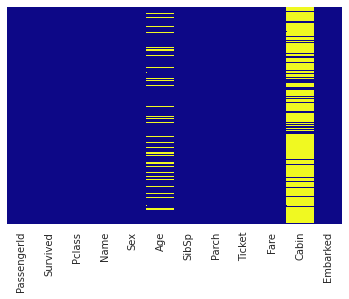

In [28]:
sns.heatmap(tita_train.isnull(), cbar=False, yticklabels=False,cmap='plasma')

In [29]:
sns.set_style('whitegrid')

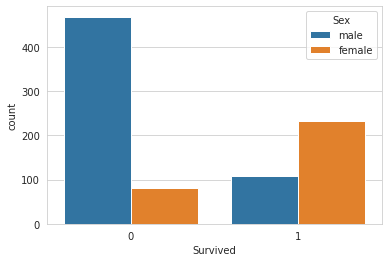

In [30]:
sns.countplot(x='Survived',hue='Sex',data=tita_train)
#the no: of male deceased were twice that of female

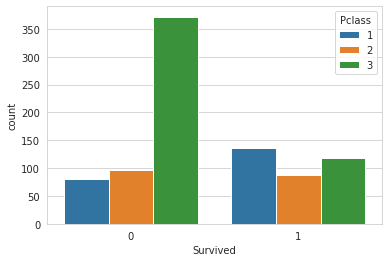

In [31]:
sns.countplot(x='Survived',hue='Pclass',data=tita_train)
#and the deceased mostly belong to 3rd class

In [32]:
tita_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


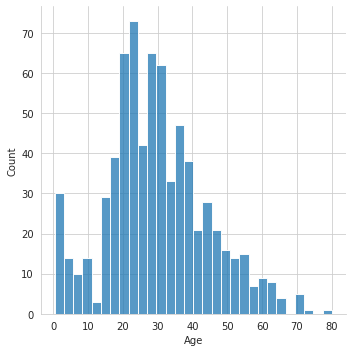

In [33]:
sns.displot(tita_train['Age'].dropna(),bins=30)
#the age group of passengers that boarded majorly was 20-30

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


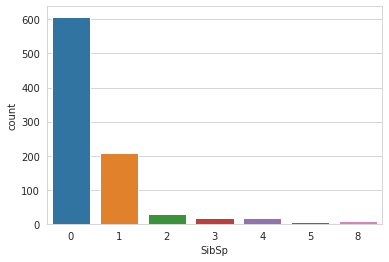

In [34]:
sns.countplot(tita_train['SibSp'])

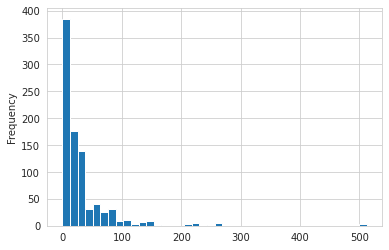

In [35]:
tita_train['Fare'].plot.hist(bins=40)

In [43]:
#Data Cleaning

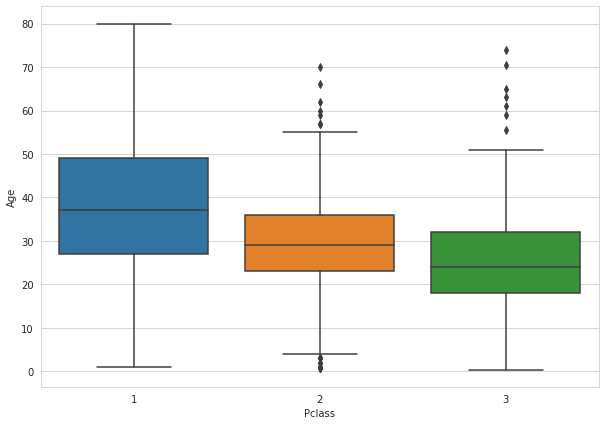

In [50]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=tita_train)

In [57]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [61]:
tita_train['Age'] = tita_train[['Age','Pclass']].apply(impute_age,axis=1)

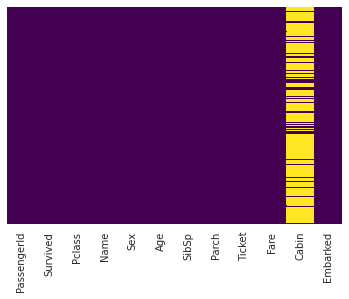

In [62]:
sns.heatmap(tita_train.isnull(), yticklabels=False, cbar= False, cmap='viridis')

In [64]:
tita_train.drop('Cabin', axis=1, inplace=True)

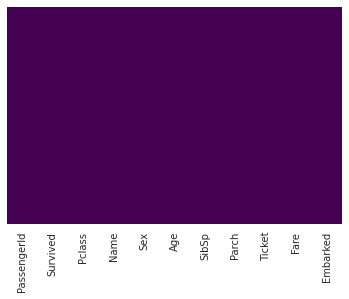

In [65]:
sns.heatmap(tita_train.isnull(), yticklabels=False, cbar= False, cmap='viridis')

In [66]:
tita_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S


In [67]:
tita_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [68]:
tita_train.dropna(inplace=True)

In [69]:
tita_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [70]:
#Convert Categorical features into dummy variables

In [71]:
pd.get_dummies(tita_train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [72]:
Sex = pd.get_dummies(tita_train['Sex'],drop_first=True)

In [75]:
embark = pd.get_dummies(tita_train['Embarked'], drop_first=True)

In [76]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [77]:
tita_train=pd.concat([tita_train,Sex,embark],axis=1)

In [78]:
tita_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S,1,0,1


In [82]:
tita_train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)


KeyError: ignored

In [83]:
tita_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24.0,1,0,7.2500,1,0,1
1,2,1,1,37.0,1,0,71.2833,0,0,0
2,3,1,3,24.0,0,0,7.9250,0,0,1
3,4,1,1,37.0,1,0,53.1000,0,0,1
4,5,0,3,24.0,0,0,8.0500,1,0,1


In [84]:
tita_train.drop(['PassengerId'],axis=1, inplace=True)

In [89]:
#Cleaning the Test dataset

In [90]:
tita_test=pd.read_csv('/content/drive/MyDrive/Datasets/titanic_test.csv')

In [91]:
tita_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


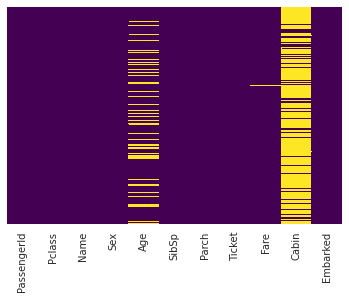

In [92]:
sns.heatmap(tita_test.isnull(), yticklabels=False, cbar= False, cmap='viridis')

In [93]:
tita_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [94]:
tita_test['Age'] = tita_test[['Age','Pclass']].apply(impute_age,axis=1)

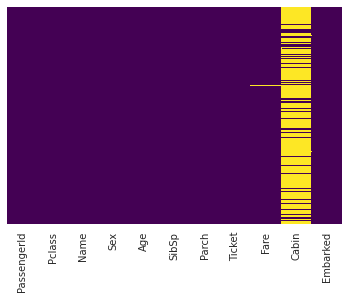

In [95]:
sns.heatmap(tita_test.isnull(), yticklabels=False, cbar= False, cmap='viridis')

In [97]:
tita_test.drop('Cabin', axis=1, inplace=True)

In [98]:
tita_test.dropna(axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,S


In [99]:
tita_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [100]:
tita_test.dropna(inplace=True)

In [101]:
tita_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [103]:
Sex_test = pd.get_dummies(tita_test['Sex'],drop_first=True)

In [104]:
embark_test = pd.get_dummies(tita_test['Embarked'], drop_first=True)

In [105]:
tita_test=pd.concat([tita_test,Sex,embark],axis=1)

In [106]:
tita_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,Q,1.0,0.0,1.0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,S,0.0,0.0,0.0
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,Q,0.0,0.0,1.0
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,S,0.0,0.0,1.0
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,S,1.0,0.0,1.0


In [107]:
tita_test.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1, inplace=True)

In [108]:
tita_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3.0,34.5,0.0,0.0,7.8292,1.0,0.0,1.0
1,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,0.0
2,2.0,62.0,0.0,0.0,9.6875,0.0,0.0,1.0
3,3.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,12.2875,1.0,0.0,1.0


In [109]:
#train and test the model

In [120]:
x_train = tita_train.drop('Survived',axis=1)
y_train = tita_train['Survived']

In [122]:
x_test = tita_test[:200]

In [124]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  199 non-null    float64
 1   Age     199 non-null    float64
 2   SibSp   199 non-null    float64
 3   Parch   199 non-null    float64
 4   Fare    199 non-null    float64
 5   male    199 non-null    float64
 6   Q       199 non-null    float64
 7   S       199 non-null    float64
dtypes: float64(8)
memory usage: 14.1 KB


In [119]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(
...     x_train, y_train, test_size=0.25, random_state=42)

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
logmodel=LogisticRegression()

In [142]:
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [143]:
predictions = logmodel.predict(X_test)

In [144]:
from sklearn.metrics import classification_report

In [145]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       141
           1       0.70      0.76      0.73        82

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
print(confusion_matrix(Y_test, predictions))

[[114  27]
 [ 20  62]]
